# Solar Power Generation Data Wrangling

#### Prepared By: Ben Chamblee -  https://github.com/Bench-amblee

### Contents:
[Introduction](#Introduction)  
[Import Libraries and Load Data](#Import_Libraries_and_Load_Data)  
[Objectives](#Objectives)  
[Initial Look at Data](#Initial_Look_at_Data)  
[Merging Dataframes and Missing Values](#Merging_Dataframes_and_Missing_Values)   
[Cleaning Data](#Cleaning_Data)  
[Array Generation vs Ambient Temperature Example](#Example)  
[Save Files](#Save)  
[Summary](#Summary)

## Introduction<a id='Introduction'></a>

The purpose of this data science project is to analyze the performance of two solar generation plants in India over the course of 30 days. We should be able to figure out how much power the plants should generate given certain weather conditions, point out when arrays are underperforming, and create a model that estimates power output given a length of time and weather conditions. This should help the plant owners get a better idea of how much power they should generate, and know if they are underperforming just in case some of the arrays aren't functioning properly or are in need of repair. 

This data comes from two different plants in India and includes four total datasets. Two of these datasets contain power generation info from each individual array in the respective solar plant, the other two contain information about the weather throughout the 30 days.

## Import Libraries and Load Data<a id='Import_Libraries_and_Load_Data'></a>

In [38]:
# imports and data uploads
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plant1 = pd.read_csv('Data/Plant_1_Generation_Data.csv')
weather1 = pd.read_csv('Data/Plant_1_Weather_Sensor_Data.csv')
plant2 = pd.read_csv('Data/Plant_2_Generation_Data.csv')
weather2 = pd.read_csv('Data/Plant_2_Weather_Sensor_Data.csv')

## Objectives<a id='Objectives'></a>

In this notebook, my goals is to take the raw solar power plant data and clean it up to make my data exploration and analysis easier later on. More importantly though I want to understand the data and what each value/column represents. 

- What does the data look like?
- Is there any particularly useful/useless feature? 
- Are there any fundamental issues with the data?

## Initial Look at Data<a id='Initial_Look_at_Data'></a>

In [39]:
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [40]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [41]:
plant2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [42]:
weather2.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


Plant1 has a different DATE_TIME format from the other datasets so I'll need to convert it. To make it easier and more consistent I'm going to convert all the values in each datasets' DATE_TIME column to the same format.

In [43]:
# plant1 has a different DATE_TIME format, plus need to convert all the dates to datetime values

plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])
plant2['DATE_TIME'] = pd.to_datetime(plant2['DATE_TIME'])
weather2['DATE_TIME'] = pd.to_datetime(weather2['DATE_TIME'])

plant1['DATE'] = plant1['DATE_TIME'].dt.date
weather1['DATE'] = weather1['DATE_TIME'].dt.date
plant2['DATE'] = plant2['DATE_TIME'].dt.date
weather2['DATE'] = weather2['DATE_TIME'].dt.date

Now we should check for null values

In [44]:
plant1.isna().sum()
weather1.isna().sum()
plant2.isna().sum()
weather2.isna().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
dtype: int64

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
dtype: int64

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
DATE           0
dtype: int64

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
dtype: int64

## Merging Dataframes and Missing Values<a id='Merging_Dataframes_and_Missing_Values'></a>

Each inidividual data set has no null values, now we'll need to make sure that all the dates and number of values are the same for each solar plant. 

For this next step we'll take the weather data and the solar power data from each plant and combine them into two full plant datasets

In [45]:
# merging the weather and power generation dataframes
df1 = plant1.merge(weather1, how='outer',on='DATE_TIME')
df1.isna().sum()

DATE_TIME               0
PLANT_ID_x             25
SOURCE_KEY_x           25
DC_POWER               25
AC_POWER               25
DAILY_YIELD            25
TOTAL_YIELD            25
DATE_x                 25
PLANT_ID_y              4
SOURCE_KEY_y            4
AMBIENT_TEMPERATURE     4
MODULE_TEMPERATURE      4
IRRADIATION             4
DATE_y                  4
dtype: int64

Looks like some of the values don't match up for the first solar plant, we'll have to look into this issue. How does the merged dataset look for the other plant?

In [46]:
df2 = plant2.merge(weather2, how='outer',on='DATE_TIME')
df2.isna().sum()

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_x                 0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE_y                 0
dtype: int64

No null values, this one looks good! Lets take a closer look at the null values in the 1st plant's dataset. Take 'AMBIENT_TEMPERATURE' for example, if you look above you'll see that there are a total of four null values in the joint dataset. Let's look at these four values:

In [47]:
df1[df1['AMBIENT_TEMPERATURE'].isna()]

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
38544,2020-06-03 14:00:00,4135001.0,1IF53ai7Xc0U56Y,7003.0,685.8,5601.0,6330385.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,4135001.0,adLQvlD726eNBSB,7204.0,705.4,5685.0,6419961.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,4135001.0,wCURE6d3bPkepu2,7545.0,738.7,5579.0,6928448.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,4135001.0,z9Y9gH1T5YWrNuG,7946.0,777.8,5541.0,7152815.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN


Just four rows for this one date and time? There should be 22 rows, one for each array. This date and time have missing info from the other 18 solar arrays. To verify this I'll look at the data from that specific instance (June 3rd at 2pm)

In [48]:
df1[df1['DATE_TIME'] == '2020-06-03 14:00:00']

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
38544,2020-06-03 14:00:00,4135001.0,1IF53ai7Xc0U56Y,7003.0,685.8,5601.0,6330385.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38545,2020-06-03 14:00:00,4135001.0,adLQvlD726eNBSB,7204.0,705.4,5685.0,6419961.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38546,2020-06-03 14:00:00,4135001.0,wCURE6d3bPkepu2,7545.0,738.7,5579.0,6928448.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN
38547,2020-06-03 14:00:00,4135001.0,z9Y9gH1T5YWrNuG,7946.0,777.8,5541.0,7152815.0,2020-06-03,NaN,NaN,NaN,NaN,NaN,NaN


This verifies it. This data and time is missing values from 18 solar arrays. To show you what I mean, take a look at what a full set of values should look like by looking at a different data time value.

In [49]:
df1[df1['DATE_TIME'] == '2020-06-02 14:00:00']

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
36456,2020-06-02 14:00:00,4135001.0,1BY6WEcLGh8j5v7,6286.571429,615.900000,5194.285714,6388633.286,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36457,2020-06-02 14:00:00,4135001.0,1IF53ai7Xc0U56Y,6817.625000,667.737500,5449.625000,6322893.625,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36458,2020-06-02 14:00:00,4135001.0,3PZuoBAID5Wc2HD,6823.750000,668.337500,5469.750000,7126738.750,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36459,2020-06-02 14:00:00,4135001.0,7JYdWkrLSPkdwr4,6612.714286,647.714286,5368.857143,7738992.857,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36460,2020-06-02 14:00:00,4135001.0,McdE0feGgRqW7Ca,6804.571429,666.442857,5582.857143,7298334.857,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36461,2020-06-02 14:00:00,4135001.0,VHMLBKoKgIrUVDU,6805.857143,666.571429,5499.714286,7345813.714,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36462,2020-06-02 14:00:00,4135001.0,WRmjgnKYAwPKWDb,6731.250000,659.312500,5368.125000,7165068.125,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36463,2020-06-02 14:00:00,4135001.0,YxYtjZvoooNbGkE,6767.125000,662.800000,5463.125000,7316979.125,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36464,2020-06-02 14:00:00,4135001.0,ZnxXDlPa8U1GXgE,6807.285714,666.728571,5553.285714,6660996.286,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02
36465,2020-06-02 14:00:00,4135001.0,ZoEaEvLYb1n2sOq,6720.875000,658.275000,5374.250000,7233814.250,2020-06-02,4135001.0,HmiyD2TTLFNqkNe,27.26248,43.491815,0.463764,2020-06-02


Looks like we're going to have to remove those values. Each array should have the same amount of observation data - keeping these four values would cause some inconsitencies. 

Now let's take a look at the other null values. It looks like there are 25 missing values in the 'DC_POWER' column, what does this look like?

In [50]:
df1[df1['DC_POWER'].isna()]

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
68778,2020-05-20 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.830852,21.024118,0.000000,2020-05-20
68779,2020-05-20 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.701162,20.786399,0.000000,2020-05-20
68780,2020-05-20 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.589626,20.572882,0.000000,2020-05-20
68781,2020-05-20 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.569009,20.622103,0.000000,2020-05-20
68782,2020-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.497382,20.584137,0.000000,2020-05-21
68783,2020-05-21 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.228943,20.230347,0.000000,2020-05-21
68784,2020-05-21 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,23.204518,20.179942,0.000000,2020-05-21
68785,2020-05-23 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,21.900024,20.994995,0.000000,2020-05-23
68786,2020-05-25 05:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,22.930503,21.104395,0.001908,2020-05-25
68787,2020-05-28 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4135001.0,HmiyD2TTLFNqkNe,21.259225,20.277036,0.000000,2020-05-28


Unfortunately there appears to be not pattern or reason as for why this data is missing. To make our analysis possible we can't have any null values so for that reason we'll have to remove these in addition to the four values we pointed out earlier.

In [51]:
df1_clean = df1.dropna()
df1_clean.isna().sum()

DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_x                 0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE_y                 0
dtype: int64

## Cleaning Data <a id='Cleaning_Data'></a>

Now that there are no more null values, lets make these datasets easier to work with. Here's what our joined datasets look like now:

In [52]:
df1_clean.head()
df2.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
0,2020-05-15,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
1,2020-05-15,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
2,2020-05-15,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
3,2020-05-15,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15
4,2020-05-15,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,4135001.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_y
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0,2020-05-15


Both dataframes have duplicate values for DATE and PLANT_ID. We'll get rid of them and just keep one moving forward

In [53]:
del df1_clean['PLANT_ID_y']
del df1_clean['DATE_y']
del df2['PLANT_ID_y']
del df2['DATE_y']

Just so we don't have to go back and remind ourselves what values are in each column, I'm going to clean up some of the labels and add units to the measuirable values like TOTAL_YIELD or AMBIENT_TEMPERATURE.

In [54]:
#adding unit labels and cleaning index labels
df1_clean.describe()
df1_clean = df1_clean.rename(columns = {'DATE_TIME':'Date_Time','SOURCE_KEY_x':'Array_Source_Key','PLANT_ID_x':'Plant_ID',
                            'DC_POWER':'DC_Power_kW','AC_POWER':'AC_Power_kW','DAILY_YIELD':'Daily_Yield_kW',
                            'TOTAL_YIELD':'Total_Yield_kW','DATE_x':'Date','SOURCE_KEY_y':'Sensor_Source_Key',
                            'AMBIENT_TEMPERATURE':'Ambient_Temperature_C','MODULE_TEMPERATURE':'Module_Temperature_C',
                            'IRRADIATION':'Irradition'})
df2_clean = df2.rename(columns = {'DATE_TIME':'Date_Time','SOURCE_KEY_x':'Array_Source_Key','PLANT_ID_x':'Plant_ID',
                            'DC_POWER':'DC_Power_kW','AC_POWER':'AC_Power_kW','DAILY_YIELD':'Daily_Yield_kW',
                            'TOTAL_YIELD':'Total_Yield_kW','DATE_x':'Date','SOURCE_KEY_y':'Sensor_Source_Key',
                            'AMBIENT_TEMPERATURE':'Ambient_Temperature_C','MODULE_TEMPERATURE':'Module_Temperature_C',
                            'IRRADIATION':'Irradition'})

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774.0,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000
mean,4135001.0,3147.177450,307.778375,3295.834644,6.978728e+06,25.558521,31.244997,0.232305
std,0.0,4036.441826,394.394865,3145.220597,4.162707e+05,3.361300,12.308283,0.301948
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,4135001.0,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000
50%,4135001.0,428.571429,41.450000,2658.473214,7.146685e+06,24.670178,24.818984,0.031620
75%,4135001.0,6365.468750,623.561161,6274.000000,7.268751e+06,27.960429,41.693659,0.454880
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06,35.252486,65.545714,1.221652


Now here's what the datasets look like:

In [55]:
df1_clean.head()
df2_clean.head()

,Date_Time,Plant_ID,Array_Source_Key,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Total_Yield_kW,Date,Sensor_Source_Key,Ambient_Temperature_C,Module_Temperature_C,Irradition
0,2020-05-15,4135001.0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001.0,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001.0,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001.0,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001.0,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


,Date_Time,Plant_ID,Array_Source_Key,DC_Power_kW,AC_Power_kW,Daily_Yield_kW,Total_Yield_kW,Date,Sensor_Source_Key,Ambient_Temperature_C,Module_Temperature_C,Irradition
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


## Array Generation vs Ambient Temperature Example<a id='Example'></a>

Now that each dataframe is combined and cleaned, let's get a better idea of what we're working with. Let's take the daily yeild value from Array1 and compare it to the ambient temperature value. The units are a kW and degrees celsius so it won't make sense to graph them directly against each other so instead I'll do 0.01 degrees celsius so that we can better see the correlation between how much power is being generated and the ambient temperature.

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Array1 Daily Yeild with Ambient Temperature')

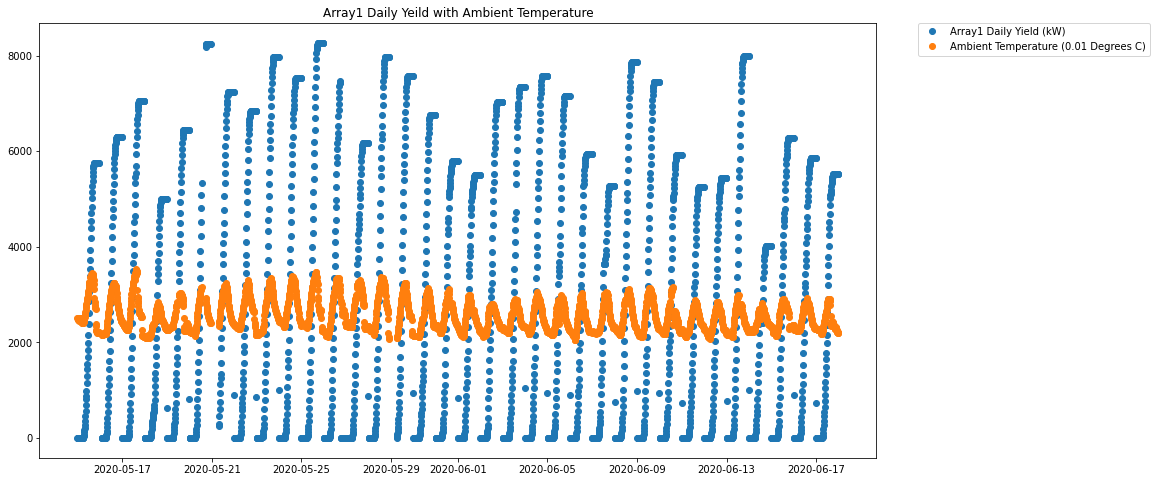

In [56]:
# now that each combined and cleaned the dataframes, let's get a better look at what we're working with
array1 = df1[df1['SOURCE_KEY_x'] == '1BY6WEcLGh8j5v7']
dates = matplotlib.dates.date2num(array1['DATE_TIME'])
plt.figure(figsize=(15,8))
plt.plot_date(dates, array1['DAILY_YIELD'],label = 'Array1 Daily Yield (kW)')
plt.plot_date(dates, (array1['AMBIENT_TEMPERATURE']*100), label = 'Ambient Temperature (0.01 Degrees C)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Array1 Daily Yeild with Ambient Temperature')
plt.show()

## Save Cleaned Data<a id='Save'></a>

In [57]:
# save new files as csv files for further analysis
df1_clean.to_csv('Data/Plant1_Data_Cleaned.csv')
df2_clean.to_csv('Data/Plant2_Data_Cleaned.csv')

## Summary<a id='Summary'></a>

- Originally we had four total datasets, two for weather data and two for power generation data
- These four were turned into two datasets, one for each power plant
- Combining the datasets led to a few null values, these were dropped due to incosistencies in the data
- The newly combined datasets are now cleaned up and ready for further analysis